# The Analysis of Flower's Role in Mansfield's Short Story

## Yujia Wei

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

## Introduction：
Katherine Mansfield has acquired an international reputation as a writer of short stories, poetry, letters, journals and reviews. Her work has been translated into more than 25 languages according to the encyclopaedia of New Zealand. She really had gifts on short-story, of which the emotional depth, the subtlety and the symbolism has amazed readers all over the world generation by generation(Stephen,7). After reading the collection of her short novels *The Garden Party and Other Stories*, I was attracted by her impressive narration, especially by the frequent usage of flowers. Flowers are constantly recurring symbol on her stories which are beautiful, delicate, and transitory(Kimber,4). From the other point of view, meanings has been attributed to flowers for a long while and it has been an important part in some cultures. For this reason, I would choose flower as my research subject and use Katherine Mansfield's storied as my corpus. In this project, the flowers which appears in her several stories were be found and tabulated. Then, the further discussion would be proceeded based on the graphs. After that, several typical flowers were selected and their functions were to be discussed. In the end, I would draw my conclusion based on my complete ananysis.

The texts I chose to form my corpus for studying is from the collection *The Garden Party and Other Stories*. Six stories were involved, which were red and disscussed together in class before. They were *The Garden Party*, *The Daughters of the Late Colonel*, *The Young Girl*, *Marriage a la Mode*, *Her First Ball*, and *An Ideal Family*.

The tool I used is NLTK and pandas. I used NLTK in tokenizing and making a neat corpus. In addition to this, its WordNet and POS were used to find the flowers in corpus. "Lexical dispersion plot" and "concordance" were used in the last analysis as well. For pandas, I used it to form graphs which made it easy to analyze the data and make comparisons.

In [151]:
import nltk
from nltk.corpus import wordnet as wn
import pandas as pd
from collections import Counter

In [152]:
garden=open('../icla2022-ubc/Garden-party.md').read()

In [153]:
gardenParts=garden.split('\n#')

In [154]:
storyDict={'The Garden Party':gardenParts[15],
          'The Daughters of the Late Colonel':gardenParts[16:29],
          'The Young Girl':gardenParts[30],
          'Marriage a la Mode':gardenParts[32],
          'Her First Ball':gardenParts[35],
          'An Ideal Family':gardenParts[-2]}

In [155]:
gardenTokensDict={}
for title in storyDict:
    texts=storyDict[title]
    lowerText=(''.join(texts)).lower()
    tokens=nltk.word_tokenize(lowerText)
    gardenTokensDict[title]=tokens

## Calculation of flowers
According to Oxford Living Dictionary, there were 5 entries for the definition of flowers. In this project, I chose the first entry of noun, which was "the coloured part of a plant from which the seed or fruit develops. Flowers usually grow at the end of a stem and last only a short time." Based on this definition, I calculated the frequency number of flowers which were used for subjects or objects. 

In my first analysis. I calculated all the flowers that appear in the six stories, and made a comparison. I used wordnet from NLTK to find all the possible hyponyms of "flower" and made a list. Then, I compared flower words of the list to my tokenized corpus. For the next, I took the common part. And finally, I counted their Number of occurrence and made this bar chart with pandas.

In [156]:
wn.synsets('flower')

[Synset('flower.n.01'),
 Synset('flower.n.02'),
 Synset('flower.n.03'),
 Synset('bloom.v.01')]

In [157]:
def findFlowerList(typE):
    flower=wn.synset(typE)
    flowerType=flower.hyponyms()
    flowerList=sorted(set(lemma.name()for synset in flowerType
                       for lemma in synset.lemmas()))
    return flowerList

There was only one word "golden age" in "flower.n.03", which was not a type of flower. As a result, based on the my definition in the previous paragraph, I chose the first 2 synsets. 

In [158]:
flowerLists=findFlowerList('flower.n.01')+findFlowerList('flower.n.02')

Some other flowers were in accord with the definition, but not in "flower" category. I searched for other possible synsets, which were "herb", "shrub" and "wood", and added the missing flower types manually.

In [159]:

otherFlowers=['rose','azalea','carnation','hydrangea','lavender','lily']
flowers=flowerLists+otherFlowers

In [160]:
# initialize the tool to get lemmas
lemmatizer=nltk.stem.WordNetLemmatizer()  

In [161]:
# I wanted to make a list that contains all lemmas of the six stories.  I started with make a list of tokens:
gardenAllTokens=[]
for title in gardenTokensDict:
    tokens=gardenTokensDict[title]
    for i in range(5):
        gardenAllTokens=gardenAllTokens+gardenTokensDict[title]

In [162]:
gardenLemmas=[lemmatizer.lemmatize(token) for token in gardenAllTokens]

In [163]:
gardenPOS=nltk.pos_tag(gardenLemmas)

In [164]:
gardenNouns=set(word for word, pos in gardenPOS if pos=="NN" or "NNS")

In [165]:
#to get the list of flower which appeared both in two list
commonFlower=gardenNouns&set(flowers)

In [166]:
commonFlower=list(commonFlower)

In [167]:
allNounsLemmaDict={}
for title in gardenTokensDict:
    tokens=gardenTokensDict[title]
    gardenPOS=nltk.pos_tag(tokens)    #first: get all nouns(single and plural)
    gardenNouns=[]
    for word,tagset in gardenPOS:
        if tagset=='NN':
            gardenNouns.append(word)
        if tagset=='NNS':
            gardenNouns.append(word)
        else:
            gardenNouns=gardenNouns
    gardenNounsLemma=[]               #sencond: lemmatize these nouns
    for n in gardenNouns:
        gardenNounsLemma.append(lemmatizer.lemmatize(n,'n'))
    counted=Counter(gardenNounsLemma) #third: count all nouns
    allNounsLemmaDict[title]=counted

In [168]:
wordDF=pd.DataFrame(allNounsLemmaDict)

<AxesSubplot:>

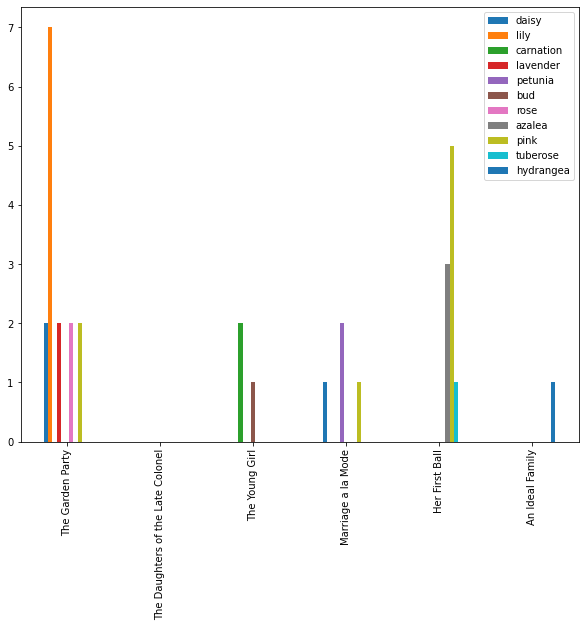

In [169]:
wordDF.loc[commonFlower].T.plot(kind='bar',figsize=(10,8))

From the graph above, I noticed that "pink" was considered as a type of flower by NLTK. To verify whether this term was treated as a kind of flower by Mansfield, I made a function for locating all the sentences that have "pink": 

In [170]:
def findPinkLocation(title):
    textWords=gardenTokensDict[title]
    text=nltk.Text(textWords)
    return text.concordance('pink')

In [171]:
findPinkLocation('The Garden Party')

Displaying 2 of 2 matches:
 wide , shallow tray full of pots of pink lilies . no other kind . nothing but
ng but lilies -- -canna lilies , big pink flowers , wide open , radiant , almo


In [172]:
findPinkLocation('Marriage a la Mode')

Displaying 2 of 2 matches:
nd johnny had said , `` it 's always pink on mine . i hate pink . '' but what 
` it 's always pink on mine . i hate pink . '' but what was william to do ? th


In [173]:
findPinkLocation('Her First Ball')

Displaying 5 of 5 matches:
 . leila put two fingers on laura 's pink velvet cloak , and they were somehow
le pink-and-silver programmes , with pink pencils and fluffy tassels . leila '
parate flowers no longer ; they were pink and white flags streaming by . `` we
 against the wall . leila tucked her pink satin feet under and fanned herself 
ts , the azaleas , the dresses , the pink faces , the velvet chairs , all beca


After researching and comparing, we could see all the "pink" in the three stories refer to a kind of colour. So this word would be removed from the list "commonFlower" manually. The final version of graph that represented the flowers appeared in Mansfield's six stories is like this:

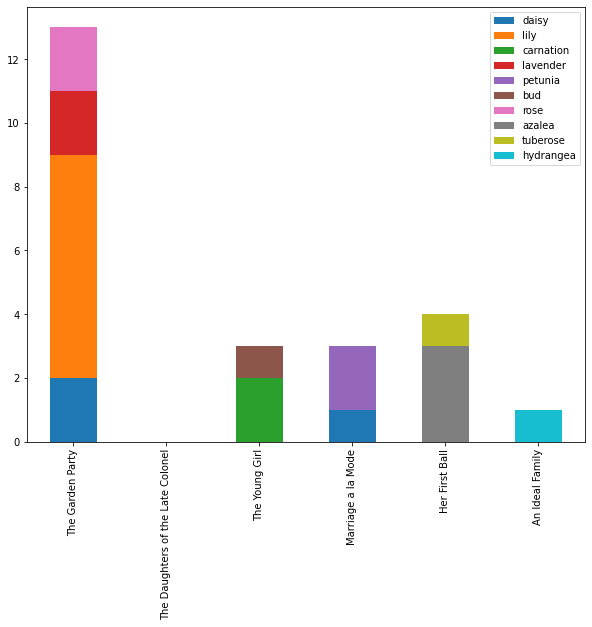

In [174]:
commonFlower.remove('pink')
df=wordDF.loc[commonFlower].T.plot(kind='bar',stacked=True,figsize=(10,8))


From this graph, we could see not all these flowers happened in these stoires.The flower lily appreared the most for 7 times. The azalea is behind the lily that appeared for 3 times. Tuberose and hydrangea were the least, which appeared only once.

It was prominent that *The Garden Party* owned the most type and most numbers of flowers. That was probably due to the stort's theme and background.The wealthy Sheridan family were preparing themselves to host a garden party. They owned a gorgeous garden where there were sevaral types of flowers. Mrs Sheridan had ordered masses of flowers as well, such as lilies. So it was no wonder that there appeared the most flower in this story.

The information is distinct that the story *The Daughters of the Late Colonel* had no flowers. Its theme was about the colonal's funeral and the life of the daughters living with their father, which seemed that its theme had no direct relation with flower as *The Garden Party*. 
Was this phenomenon related to the stort's sentiment? In the next part, I would do some sentiment analysis.

## Sentiment Analysis

In this part, I would used the tool'nltk sentiment' to analyze the compound sentiment of the text *The Daughters of the Late Colonel*, to test whether the occurrence of flowers was related to the sentiments of  selected text.


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [38]:
sentimentAnalyzer= SentimentIntensityAnalyzer()

In [39]:
def getSentiment(para):
    return sentimentAnalyzer.polarity_scores(para)['compound']

In [40]:
colo=' '.join(gardenParts[16:29])

In [41]:
coloPara=colo.split('\n\n')

In [62]:
coloSentimentData=[getSentiment(para) for para in coloPara]

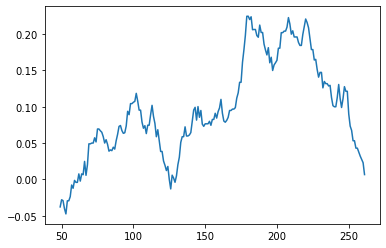

In [63]:
coloSentiment=pd.Series(coloSentimentData).rolling(50).mean().plot()

To make the graph smoother and easier to analyze, I rolled the sentiment data for taking average of each 50 paragraph. We could get the information that most parts of *The Daughters of the Late Colonel* were above zero line. That is to say, the sentiment of this text tended to positive, at least, not negative.

Through history, people always use flower to express feelings, sentiment and association(Seaton,2). And we all get use of that flowers are used to express feelings, no matter possitive for negative. For example, jasmine is for amiability, and bramble is for envy(Grennaway,49). However, although it was intuitive to get the sentiment of *The Daughters of the Late Colonel* from the figure, the flower of this book was absent. This might indicate that flowers do have sentimental meanings. However, in Mansfield's story, the sentimental function may not be the leading role flowers. To figure out flowers function in Mansfield's stories, I would analyze some specific sentences.

## Flowers in the texts and it's function
In this part, I would choose some typical flowers and try to make a expression of flowers' function in Mansfield's story based on there locations and context. 

In [109]:
ballWords=gardenTokensDict['Her First Ball']

In [112]:
ballText=nltk.Text(ballWords)

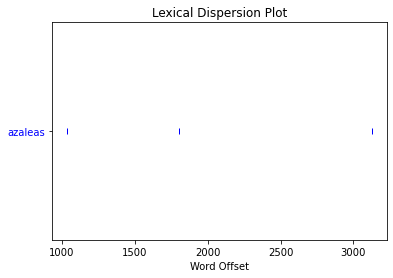

In [113]:
ballText.dispersion_plot(['azaleas'])

In [114]:
ballText.concordance('azaleas')

Displaying 3 of 3 matches:
t the gleaming , golden floor , the azaleas , the lanterns , the stage at one e
tleman always clutched you so . the azaleas were separate flowers no longer ; t
 glided , glided . the lights , the azaleas , the dresses , the pink faces , th


I made this Lexical dispersion plot to find the location of azaleas. With the function of "concordance", I found sentences where these words lie:
>She clutched her fan, and, gazing at the gleaming, golden floor, the azaleas, the lanterns, the stage at one end with its red carpet and gilt chairs and the band in a corner, she thought breathlessly, “How heavenly; how simply heavenly!”

>The azaleas were separate flowers no longer; they were pink and white flags streaming by.

>The lights, the azaleas, the dresses, the pink faces, the velvet chairs, all became one beautiful flying wheel.

Give a close read and compare these sentence, we can find the first was "heavenly" azaleas, the second was "seperate", the last I  called it "dazzing" azaleas. Just as Shen mentioned, Convert progressions are the supplement of overt plots sometimes(Shen D.,277). We could see that the changes in azaleas is correspond with the changes in Character Laura's emotions.

Besides, the azalea here was a symbol of the character as well. Take a look at the last appearance of this word:
> The lights, the azaleas, the dresses, the pink faces, the velvet chairs, all became one beautiful flying wheel.

As azaleas is pink, "the pink faces" here might indicate girls who joined the ball. The dances made their face pink as azaleas. Moreover, according to document, azalea had the language of temperance. It was a little bit ironic that the girls were chasing their marvellous time, which rebelled the temperance to some kind. 


Mansfield was writing in a period characterised by a crisis in and of gender, a crisis fuelled both by the continuing feminist debate and challenges to the established social and political order(Simpson,2015). So I would choose other flowers for interpretation: 

In [145]:
def findLilyLocation(title):
    textWords=gardenTokensDict[title]
    text=nltk.Text(textWords)
    return text.concordance('lilies')

In [146]:
findLilyLocation('The Garden Party')

Displaying 8 of 8 matches:
, shallow tray full of pots of pink lilies . no other kind . nothing but lilie
ilies . no other kind . nothing but lilies -- -canna lilies , big pink flowers
kind . nothing but lilies -- -canna lilies , big pink flowers , wide open , ra
if to warm herself at that blaze of lilies ; she felt they were in her fingers
n my life i shall have enough canna lilies . the garden-party will be a good e
ere 's the man . '' he carried more lilies still , another whole tray . `` ban
you are . no , wait , take the arum lilies too . people of that class are so i
that class are so impressed by arum lilies . '' `` the stems will ruin her lac


In [124]:
def findLavenderLocation(title):
    textWords=gardenTokensDict[title]
    text=nltk.Text(textWords)
    return text.concordance('lavender')

In [125]:
findLavenderLocation('The Garden Party')

Displaying 2 of 2 matches:
 he bent down , pinched a sprig of lavender , put his thumb and forefinger to 
e that -- -caring for the smell of lavender . how many men that she knew would


After locating the sentences where lilies and lavenders lie, I found 2 interesting sentences:

>It was, indeed. There, just inside the door, stood a wide, shallow tray full of pots of pink lilies. No other kind. Nothing but lilies—canna lilies, big pink flowers, wide open, radiant, almost frighteningly alive on bright crimson stems.

> He bent down, pinched a sprig of lavender, put his thumb and forefinger to his nose and snuffed up the smell. 

Considering the shape and other characteristics of lily and lanvender, we can infer that these two flowers had senses of sexual orientation. Lily and lanvender here indicated sex organs of female and male. This was the awaken of feminist and also gender issues. Through these 2 sentences, we could see sexual issues were discussed. Moreover, in other stories in Mansfield's collection, the part of woman body were prensented straightforward, which did was a progress, compared to *The Moonstone* and other Victorian literature.

Besides, the subtle metaphors of flowers went with the unconscious growth of the charactee. In the story *The Garden Party*, character Laura was in her adolescence age. The innocent girl had some fancy on the workmen in her house for the garden party because workmen came from the class she was different and not well familiar with and curiosity as well as the nature of her age made the sexual vision. Manfield didn't make comparison directly. Instead, these metaphors were subtle adn barely noticeable. I think in Laura's age, this fancy was uncontrolled and appeared without being aware of it. This unconscious behavior was just the her changes in growth, and it was correspond with the narrative of these two sentences.



## Conclusion
Flower has an important role in our life. Flowers carry on specialized meannings in our culture. Not only we use them to express our emotions to our beloved ones, friends or for some specific occasions, but we often encounter them in literature as a image of symbol. Flowers do reflect sentiments in literature sometimes. But for six stories *The Garden Party*, *The Daughters of the Late Colonel*, *The Young Girl*, *Marriage a la Mode*, *Her First Ball* and *An Ideal Family* of Katherine Mansfield, flowers are not the key role that convey sentiments. The narrative of flowers is like a secrect line in the stories. It's the overt plot as well as a convert progression of the main narrative of which is the supplement when it changes. 

To interprating flower's symbolic image further, detailed analysis of the sentences where flower words lie was conducted. 2 features were outstanding. One is the flowers were the representation of a group of people or a single person who might share the similar characteristics with flowers. The other is the flowers had sexual metaphor. Both of them can reflect the social background of Katherine Mansfield -- the awakening and liberty age in cultures.


In conclusion, the role of flowers in these Katherine Mansfield's six stories might not be used to indicate the sentiment. Instead, they were related to characters, and were complements of the main plots.

## Works Cited

Arkin,Stephen. Introduction. The collected stories of Katherine Mansfield. Hertfordshire:Wordsworth Editions, 2006.

Greenaway,Kate. Language of flowers. London ; New York : F. Warne, 2007.

Kimber, Gerri. "From major to minor: critical (mis) interpretation in the fiction of Katherine Mansfield." 2001 Group French Studies E-Journal: Critical Voices 3 (2008).

Kimber, Gerri. Katherine Mansfield and the Art of the Short Story. Springer, 2014.

Seaton, Beverly. The language of flowers: A history. University of Virginia Press, 2012.

Shen, Dan. “Style and Rhetoric of Short Narrative Fiction.” Style, vol. 47, no. 01, 2013, pp. 276–298., https://doi.org/10.4324/9780203093122. 

Simpson, Kathryn. "Strange flower, half opened’: Katherine Mansfield and the Flowering of ‘the Self." Katherine Mansfield and Continental Europe. Palgrave Macmillan, London, 2015. 185-201.


